# Lab 08: Cycle GANs
# st121395 | Chanapa Pananookooln

CycleGAN is a very popular GAN architecture. It is used to learn transformations between images of different styles.

Example Cycle GANs:

 - Mapping between artistic and realistic images
 - Transformation between images of horses and zebras
 - Transformation between winter images and summer images
 - FaceApp or DeepFake

Assume that ${\cal X}$ is the set of images of horses and ${\cal Y}$ is the set of images of zebras.

The goal of CycleGAN is to learn a mapping function $G: \mathcal{X} \rightarrow \mathcal{Y}$,
such that an image generated by $G(X)$ for some $X\in\mathcal{X}$ are indistinguishable from
samples $Y$ from a training set over $\mathcal{Y}$.
This objective is achieved using an adversarial loss function. We not only learn $G(\cdot)$, but we also learn an inverse mapping function $F: \mathcal{Y} \rightarrow \mathcal{X}$
with the help of a cycle-consistency loss to encourage $F(G(X)) \approx X$.

While training, two kinds of training observations may be given as input:

 - *Paired* images $\{(X^{(i)}, Y^{(i)})\}_{i\in 1..N}$.
 - *Unpaired* image sets $\{X^{(i)}\}_{i\in 1..N_{X}}$ and $\{Y^{(i)}\}_{i\in 1..N_{Y}}$ without any special relationship between $X^{(i)}$ and $Y^{(i)}$.

The adversarial formulation of the Cycle GAN includes a discriminator $D_X$ that attempts to classify observations
$G(X^{(i)})$ and $Y^{(i)}$ as fake or real.
Similarly, we also have a discriminator $D_Y$ that attempts to distinguish $F(Y^{(i)})$ from $X^{(i)}$.

Besides the adversarial Loss, the Cycle GAN uses two cycle-consistency losses; this enables training without paired images.
We minimize reconstruction losses $\| F(G(X)) - X \|$ and $\|G(F(Y)) - Y\|$.
In summary, the Cycle GAN comprises the three loss functions:

The optimization is similar to that of the ordinary GAN, except we have two generators and two discriminators:

## Get and prepare Cycle GAN implementation

Today, we'll use the authors' implementation of Cycle GANs.

In [1]:
# Download the Cycle GAN implementation
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix.git

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2337, done.
^Cceiving objects:  22% (535/2337), 5.18 MiB | 819.00 KiB/s   


This implementation requires dominate and visdom for visualization. They enable monitoring the result of training via a Web server.

In [2]:
# !pip install dominate visdom

Next, download the horse2zebra data set

In [3]:
# !cd pytorch-CycleGAN-and-pix2pix ; ./datasets/download_cyclegan_dataset.sh horse2zebra

## Start a training run

We won't be able to finish a training run in class -- 200 epochs of the horse2zebra dataset with batch size 1 takes 10-20 hours on our GPUs. However, we can start a run and see how it goes.

We'll also see an example of how to use visdom, which is probably better than matplotlib for visualization.

### In terminal 1:

    python -m visdom.server
   
### In terminal 2:

    python train.py --dataroot ./datasets/horse2zebra --name horse2zebra_cyclegan --model cycle_gan

# Train hourse2zebra

I had to edit the --gpu_ids in the ./option/base_option.py to choose the ID of the availbale GPU. Then I was able to train the Cygle GAN and monitor the results via Visdom.

Here is an example of the screenshot while training Horse2Zebra Cycle GAN.

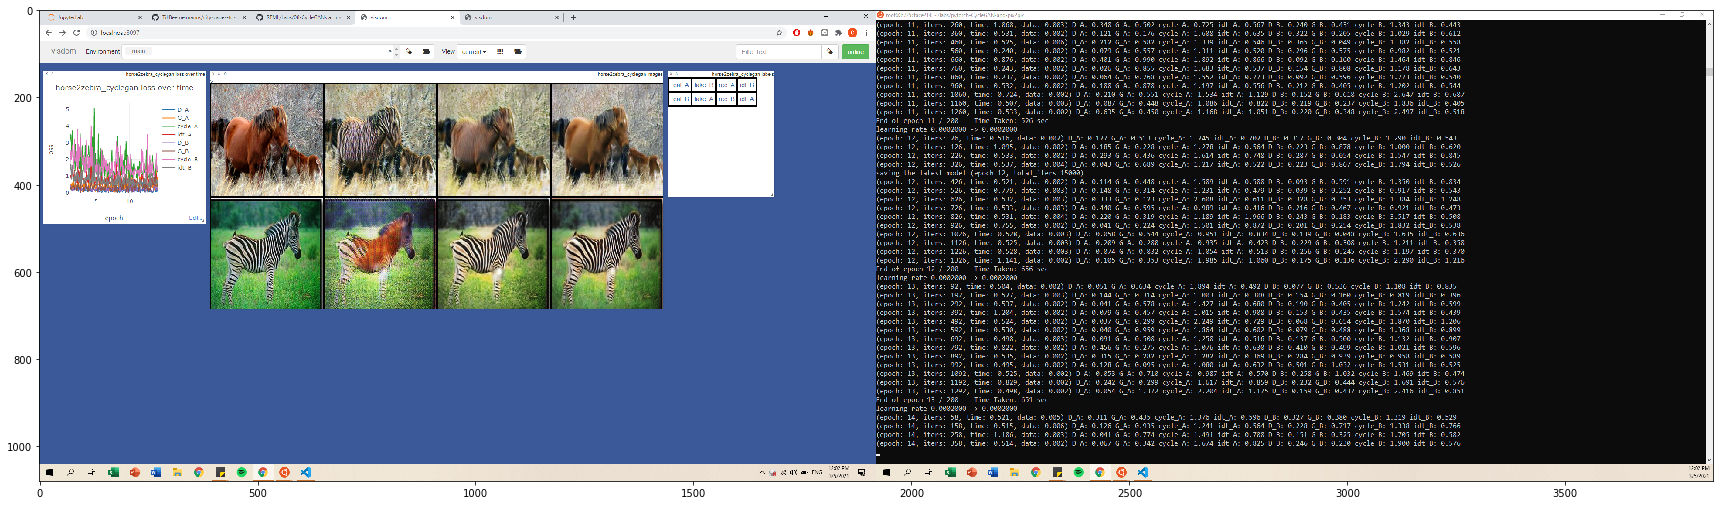

In [10]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

plt.figure(figsize=(30,30))
plt.imshow(mpimg.imread('h2z.png'))

We can see that the implementation show 3 components in visdom.

The first part is the loss history with respect to the epochs.

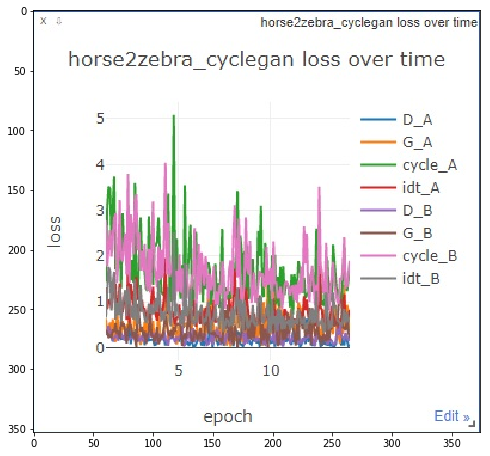

In [13]:
plt.figure(figsize=(8,8))
plt.imshow(mpimg.imread('losslog.png'))

The other 2 parts are the output images and their labels.

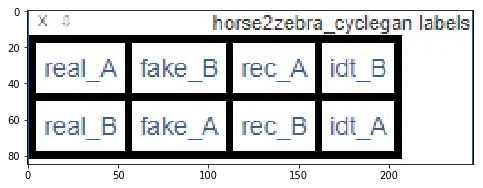

In [14]:
plt.figure(figsize=(8,8))
plt.imshow(mpimg.imread('label.png'))

The first two images on the left most are the real images. The rest of the  labels represent $G(X), F(Y), F(G(X)), G(F(Y)), F(X),$ and $G(Y)$

I will show these images later in the result part.

# Results

I trained the hourse2zebra Cycle GAN up to epoch 27.

These are the latest loss log of epoch 27 from the loss_log.txt in ./checkpoints/hourse2zebra_cyclegan.

    (epoch: 27, iters: 16, time: 0.530, data: 0.002) D_A: 0.404 G_A: 0.085 cycle_A: 1.344 idt_A: 0.457 D_B: 0.309 G_B: 0.213 cycle_B: 1.008 idt_B: 0.533 
    (epoch: 27, iters: 116, time: 1.358, data: 0.002) D_A: 0.040 G_A: 0.752 cycle_A: 1.012 idt_A: 0.529 D_B: 0.266 G_B: 0.263 cycle_B: 1.241 idt_B: 0.506 
    (epoch: 27, iters: 216, time: 0.538, data: 0.002) D_A: 0.139 G_A: 0.188 cycle_A: 2.537 idt_A: 0.336 D_B: 0.087 G_B: 0.399 cycle_B: 0.907 idt_B: 1.192 
    (epoch: 27, iters: 316, time: 0.525, data: 0.002) D_A: 0.099 G_A: 0.503 cycle_A: 3.568 idt_A: 0.889 D_B: 0.134 G_B: 0.300 cycle_B: 2.153 idt_B: 1.575 
    (epoch: 27, iters: 416, time: 0.528, data: 0.002) D_A: 0.069 G_A: 0.194 cycle_A: 1.378 idt_A: 0.668 D_B: 0.251 G_B: 0.522 cycle_B: 1.396 idt_B: 0.765 
    (epoch: 27, iters: 516, time: 0.732, data: 0.002) D_A: 0.132 G_A: 0.313 cycle_A: 1.308 idt_A: 0.710 D_B: 0.251 G_B: 0.694 cycle_B: 1.403 idt_B: 0.489 
    (epoch: 27, iters: 616, time: 0.534, data: 0.002) D_A: 0.248 G_A: 0.398 cycle_A: 0.821 idt_A: 0.607 D_B: 0.118 G_B: 0.297 cycle_B: 0.935 idt_B: 0.322 
    (epoch: 27, iters: 716, time: 0.244, data: 0.002) D_A: 0.152 G_A: 1.027 cycle_A: 1.188 idt_A: 0.413 D_B: 0.050 G_B: 0.832 cycle_B: 1.231 idt_B: 0.675 
    (epoch: 27, iters: 816, time: 0.508, data: 0.003) D_A: 0.037 G_A: 0.738 cycle_A: 0.922 idt_A: 0.406 D_B: 0.190 G_B: 0.304 cycle_B: 0.941 idt_B: 0.379 
    (epoch: 27, iters: 916, time: 0.766, data: 0.003) D_A: 0.038 G_A: 0.836 cycle_A: 1.431 idt_A: 0.443 D_B: 0.111 G_B: 0.364 cycle_B: 1.548 idt_B: 0.465 
    (epoch: 27, iters: 1016, time: 0.514, data: 0.002) D_A: 0.415 G_A: 0.552 cycle_A: 1.145 idt_A: 0.561 D_B: 0.429 G_B: 0.212 cycle_B: 1.146 idt_B: 0.534 
    (epoch: 27, iters: 1116, time: 0.539, data: 0.002) D_A: 0.166 G_A: 0.504 cycle_A: 0.943 idt_A: 0.507 D_B: 0.131 G_B: 0.284 cycle_B: 1.564 idt_B: 0.504 
    (epoch: 27, iters: 1216, time: 0.505, data: 0.002) D_A: 0.092 G_A: 0.446 cycle_A: 1.367 idt_A: 0.576 D_B: 0.137 G_B: 0.037 cycle_B: 1.913 idt_B: 0.795 
        
From the loss history graph above we can see that the losses are still fluctuating. The losses with the highest values are the cycle-consistency loss of both Generators which we can see that they can decrease further by more training epochs.

Text(0.5,1,'idt_A')

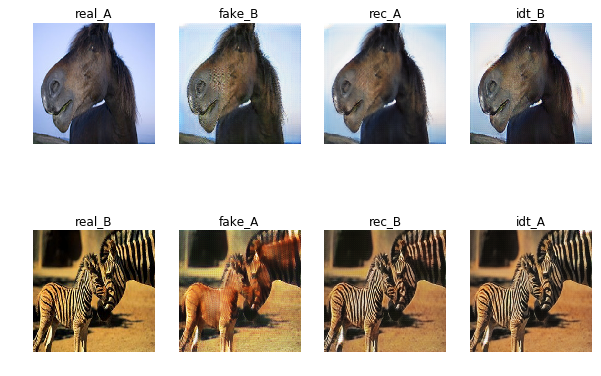

In [16]:
import cv2 
from matplotlib import pyplot as plt 
  
# create figure 
fig = plt.figure(figsize=(10, 7)) 

rows = 2
columns = 4
  
# Adds a subplot at the 1st position 
fig.add_subplot(rows, columns, 1) 
  
# showing image 
plt.imshow(mpimg.imread('../../pytorch-CycleGAN-and-pix2pix/checkpoints/horse2zebra_cyclegan/web/images/epoch027_real_A.png'))
plt.axis('off') 
plt.title("real_A") 
  
# Adds a subplot at the 2nd position 
fig.add_subplot(rows, columns, 2) 
  
# showing image 
plt.imshow(mpimg.imread('../../pytorch-CycleGAN-and-pix2pix/checkpoints/horse2zebra_cyclegan/web/images/epoch027_fake_B.png'))
plt.axis('off') 
plt.title("fake_B") 
  
# Adds a subplot at the 3rd position 
fig.add_subplot(rows, columns, 3) 
  
# showing image 
plt.imshow(mpimg.imread('../../pytorch-CycleGAN-and-pix2pix/checkpoints/horse2zebra_cyclegan/web/images/epoch027_rec_A.png'))
plt.axis('off') 
plt.title("rec_A") 
  
# showing image 
fig.add_subplot(rows, columns, 4) 
plt.imshow(mpimg.imread('../../pytorch-CycleGAN-and-pix2pix/checkpoints/horse2zebra_cyclegan/web/images/epoch027_idt_B.png'))
plt.axis('off') 
plt.title("idt_B") 

fig.add_subplot(rows, columns, 5) 
plt.imshow(mpimg.imread('../../pytorch-CycleGAN-and-pix2pix/checkpoints/horse2zebra_cyclegan/web/images/epoch027_real_B.png'))
plt.axis('off') 
plt.title("real_B") 

fig.add_subplot(rows, columns, 6) 
plt.imshow(mpimg.imread('../../pytorch-CycleGAN-and-pix2pix/checkpoints/horse2zebra_cyclegan/web/images/epoch027_fake_A.png'))
plt.axis('off') 
plt.title("fake_A") 

fig.add_subplot(rows, columns, 7) 
plt.imshow(mpimg.imread('../../pytorch-CycleGAN-and-pix2pix/checkpoints/horse2zebra_cyclegan/web/images/epoch027_rec_B.png'))
plt.axis('off') 
plt.title("rec_B") 

fig.add_subplot(rows, columns, 8) 
plt.imshow(mpimg.imread('../../pytorch-CycleGAN-and-pix2pix/checkpoints/horse2zebra_cyclegan/web/images/epoch027_idt_A.png'))
plt.axis('off') 
plt.title("idt_A") 

We can see that in the fake_B image the horse are staring to have a very small patterns of the zebra on its head and in the fake_A image it can be seen clearly that the zebra's color have changed to become a lot like a horse.

As for the $F(G(X)), G(F(Y)),F(X)$, and $G(Y)$ they already look a lot like the orginal images.

Here are some more examples of the fake images while training.

Text(0.5,1,'fake_A')

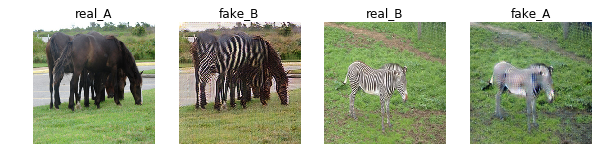

In [29]:
import cv2 
from matplotlib import pyplot as plt 
  
# create figure 
fig = plt.figure(figsize=(10, 7)) 

rows = 1
columns = 4
  
# Adds a subplot at the 1st position 
fig.add_subplot(rows, columns, 1) 
  
# showing image 
plt.imshow(mpimg.imread('../../pytorch-CycleGAN-and-pix2pix/checkpoints/horse2zebra_cyclegan/web/images/epoch022_real_A.png'))
plt.axis('off') 
plt.title("real_A") 
  
# Adds a subplot at the 2nd position 
fig.add_subplot(rows, columns, 2) 
  
# showing image 
plt.imshow(mpimg.imread('../../pytorch-CycleGAN-and-pix2pix/checkpoints/horse2zebra_cyclegan/web/images/epoch022_fake_B.png'))
plt.axis('off') 
plt.title("fake_B") 
  
# Adds a subplot at the 3rd position 
fig.add_subplot(rows, columns, 3) 
  
# showing image 
plt.imshow(mpimg.imread('../../pytorch-CycleGAN-and-pix2pix/checkpoints/horse2zebra_cyclegan/web/images/epoch021_real_B.png'))
plt.axis('off') 
plt.title("real_B") 
  
# showing image 
fig.add_subplot(rows, columns, 4) 
plt.imshow(mpimg.imread('../../pytorch-CycleGAN-and-pix2pix/checkpoints/horse2zebra_cyclegan/web/images/epoch021_fake_A.png'))
plt.axis('off') 
plt.title("fake_A") 

# Train AIT2CELEB Cycle GAN

Using the dataset from the link provided in class. Then create a new folder in the ./datasets folder to match with the implementation's requirement. Then we can start training using the same method only changing the model name to ait2celeb. We also get all the results ready in the folder.

An example screenshot while training.

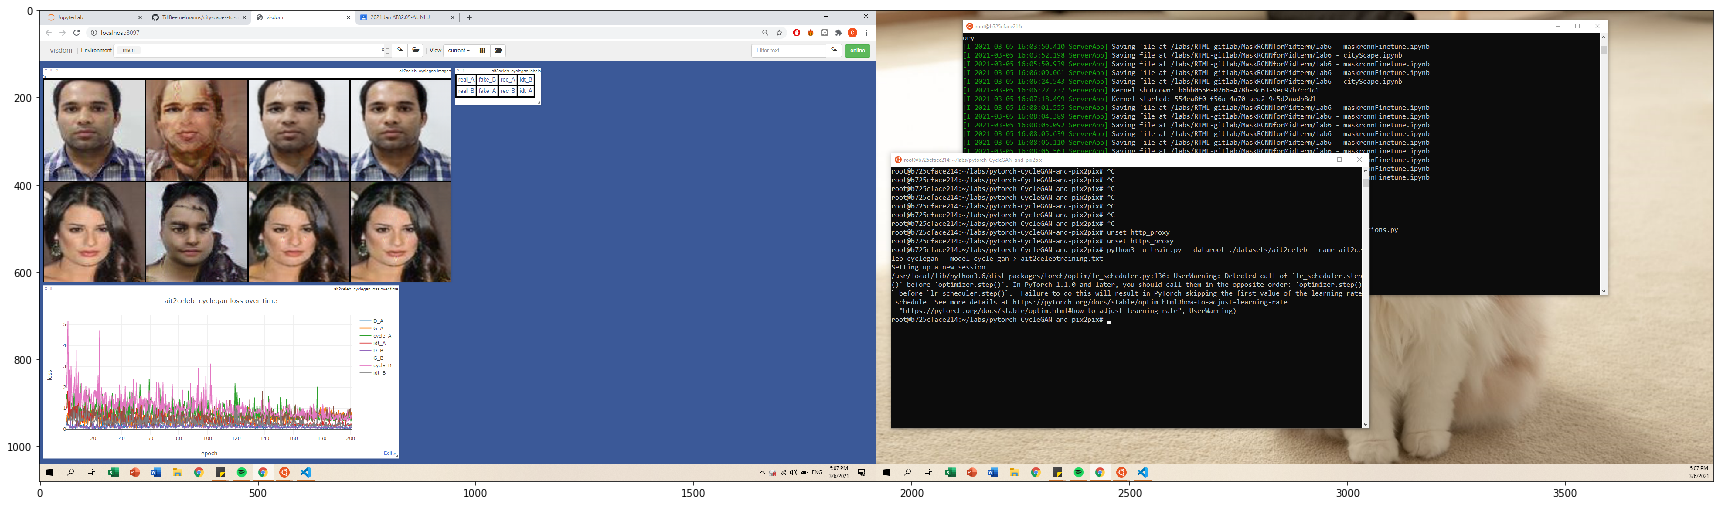

In [9]:
plt.figure(figsize=(30,30))
plt.imshow(mpimg.imread('celeb.png'))

# Results

For this exercise, I trained the model for 200 epochs. And I also tried continuing the training for another 200 epoch.

## The loss history plot and log

We can see the the loss are all converging quite well.

This is the loss log for the last epoch.

    (epoch: 200, iters: 9, time: 0.223, data: 0.002) D_A: 0.134 G_A: 0.537 cycle_A: 0.350 idt_A: 0.271 D_B: 0.106 G_B: 0.810 cycle_B: 0.648 idt_B: 0.167 
    (epoch: 200, iters: 109, time: 123.471, data: 0.003) D_A: 0.115 G_A: 0.439 cycle_A: 0.383 idt_A: 0.131 D_B: 0.085 G_B: 0.761 cycle_B: 0.523 idt_B: 0.147 
    (epoch: 200, iters: 209, time: 0.228, data: 0.002) D_A: 0.213 G_A: 0.356 cycle_A: 0.488 idt_A: 0.177 D_B: 0.138 G_B: 0.294 cycle_B: 0.468 idt_B: 0.201 
    (epoch: 200, iters: 309, time: 0.222, data: 0.003) D_A: 0.080 G_A: 0.500 cycle_A: 0.380 idt_A: 0.201 D_B: 0.050 G_B: 1.080 cycle_B: 0.681 idt_B: 0.104 

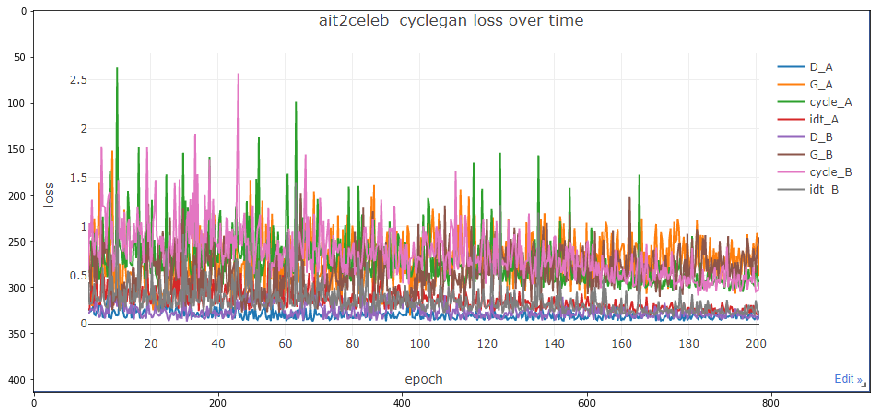

In [19]:
plt.figure(figsize=(15,15))
plt.imshow(mpimg.imread('ait.png'))

## The image results

Text(0.5,1,'idt_A')

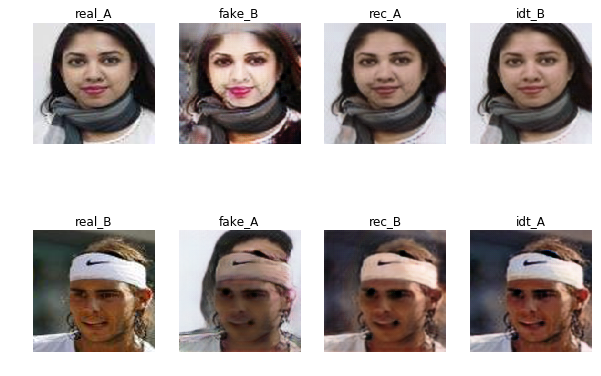

In [22]:
# create figure 
fig = plt.figure(figsize=(10, 7)) 

rows = 2
columns = 4
  
# Adds a subplot at the 1st position 
fig.add_subplot(rows, columns, 1) 
  
# showing image 
plt.imshow(mpimg.imread('../../pytorch-CycleGAN-and-pix2pix/checkpoints/ait2celebnew_cyclegan/web/images/epoch101_real_A.png'))
plt.axis('off') 
plt.title("real_A") 
  
# Adds a subplot at the 2nd position 
fig.add_subplot(rows, columns, 2) 
  
# showing image 
plt.imshow(mpimg.imread('../../pytorch-CycleGAN-and-pix2pix/checkpoints/ait2celebnew_cyclegan/web/images/epoch101_fake_B.png'))
plt.axis('off') 
plt.title("fake_B") 
  
# Adds a subplot at the 3rd position 
fig.add_subplot(rows, columns, 3) 
  
# showing image 
plt.imshow(mpimg.imread('../../pytorch-CycleGAN-and-pix2pix/checkpoints/ait2celebnew_cyclegan/web/images/epoch101_rec_A.png'))
plt.axis('off') 
plt.title("rec_A") 
  
# showing image 
fig.add_subplot(rows, columns, 4) 
plt.imshow(mpimg.imread('../../pytorch-CycleGAN-and-pix2pix/checkpoints/ait2celebnew_cyclegan/web/images/epoch101_idt_B.png'))
plt.axis('off') 
plt.title("idt_B") 

fig.add_subplot(rows, columns, 5) 
plt.imshow(mpimg.imread('../../pytorch-CycleGAN-and-pix2pix/checkpoints/ait2celebnew_cyclegan/web/images/epoch101_real_B.png'))
plt.axis('off') 
plt.title("real_B") 

fig.add_subplot(rows, columns, 6) 
plt.imshow(mpimg.imread('../../pytorch-CycleGAN-and-pix2pix/checkpoints/ait2celebnew_cyclegan/web/images/epoch101_fake_A.png'))
plt.axis('off') 
plt.title("fake_A") 

fig.add_subplot(rows, columns, 7) 
plt.imshow(mpimg.imread('../../pytorch-CycleGAN-and-pix2pix/checkpoints/ait2celebnew_cyclegan/web/images/epoch101_rec_B.png'))
plt.axis('off') 
plt.title("rec_B") 

fig.add_subplot(rows, columns, 8) 
plt.imshow(mpimg.imread('../../pytorch-CycleGAN-and-pix2pix/checkpoints/ait2celebnew_cyclegan/web/images/epoch101_idt_A.png'))
plt.axis('off') 
plt.title("idt_A")

Here I display the result of epoch 100 which I think the results are quite intersting.

For the fake celeb image we can see that the model have edit some characteristics of the face such as redden the lips, brighten the skin and adding non-white background.

While the fake ait image the model tries to add a white background and also change the color scheme to match with the ait dataset.

These results indicate that the model has really learned the feature of the collection of image as a whole just like in the paper has said.


I also test the model on the test set data where I got the resulting image in ./results/ait2celeb_cyclegan

Here are some example of converting the test ait images into celebs.

Text(0.5,1,'fake_B')

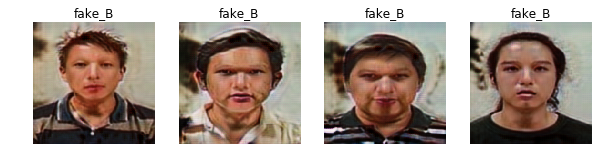

In [30]:
# create figure 
fig = plt.figure(figsize=(10, 7)) 

rows = 1
columns = 4
  
# Adds a subplot at the 1st position 
fig.add_subplot(rows, columns, 1) 
  
# showing image 
plt.imshow(mpimg.imread('../../pytorch-CycleGAN-and-pix2pix/result100/ait2celebnew_cyclegan/test_latest/images/000317_fake_B.png'))
plt.axis('off') 
plt.title("fake_B") 
  
# Adds a subplot at the 2nd position 
fig.add_subplot(rows, columns, 2) 
  
# showing image 
plt.imshow(mpimg.imread('../../pytorch-CycleGAN-and-pix2pix/result100/ait2celebnew_cyclegan/test_latest/images/000315_fake_B.png'))
plt.axis('off') 
plt.title("fake_B") 
  
# Adds a subplot at the 3rd position 
fig.add_subplot(rows, columns, 3) 
  
# showing image 
plt.imshow(mpimg.imread('../../pytorch-CycleGAN-and-pix2pix/result100/ait2celebnew_cyclegan/test_latest/images/000313_fake_B.png'))
plt.axis('off') 
plt.title("fake_B") 
  
# showing image 
fig.add_subplot(rows, columns, 4) 
plt.imshow(mpimg.imread('../../pytorch-CycleGAN-and-pix2pix/result100/ait2celebnew_cyclegan/test_latest/images/000311_fake_B.png'))
plt.axis('off') 
plt.title("fake_B") 

# Conclusion

In this lab we learned about Cycle GAN, its architecture and all the losses.
We run the author's implementation of Cycle GAN and see the results of horse2zebra and ait2celeb very clearly eventhough both models clearly need more training or more data samples.
It was very fun to see GAN impact on the profile photos of our friends.
I learned about visdom and also learned how to run the script on terminal.